<h2 style="color:green"> IMPORT LIBRARIES </h2>

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

<h2 style="color:green"> IMPORT DATASET </h2>

In [2]:
import pandas as pd
data=pd.read_csv("C:/Users/bhava/Downloads/weight-height.csv",na_values="?")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<h2 style="color:green"> CHECK NULL DATA  </h2>

In [3]:
data.isnull().sum()

Gender    0
Height    5
Weight    5
dtype: int64

<h2 style="color:green"> DROP UNWANTED COLUMNS </h2>

In [4]:
data.drop(['Gender'],axis=1,inplace=True)

<h2 style="color:green"> BOTH HEIGHT,WEIGHT-CONTINUOUS </h2>

In [5]:
data.describe()

,Height,Weight
count,194.000000,194.000000
mean,68.806316,185.574280
std,2.660740,19.450003
min,61.937323,146.739798
25%,67.022175,170.458666
50%,68.493933,183.348240
75%,70.794784,198.639430
max,76.709835,241.893563


<h2 style="color:green"> FILL NULL DATA WITH MEDIAN </h2>

In [6]:
data.Height.fillna(data.Height.median(),inplace=True)

In [7]:
data.Weight.fillna(data.Weight.median(),inplace=True)

<h2 style="color:green"> BOXPLOT-CHECK FOR OUTLIERS </h2>

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb0a55d580>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb0a55dca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb0a55d1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb0a567400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb0a567790>],
 'means': []}

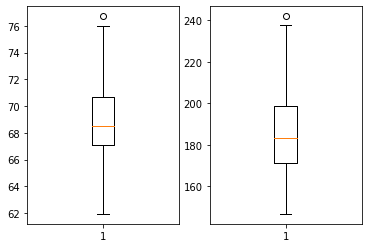

In [8]:
plt.subplot(1,2,1)
plt.boxplot(data["Height"])
plt.subplot(1,2,2)
plt.boxplot(data["Weight"])

In [9]:
stats.shapiro(data.Height)

ShapiroResult(statistic=0.99258953332901, pvalue=0.41264161467552185)

In [10]:
stats.shapiro(data.Weight)

ShapiroResult(statistic=0.9829728007316589, pvalue=0.016405556350946426)

<h2 style="color:green"> SPLIT THE DATA INTO TRAINING SET AND TEST SET </h2>

In [11]:
train=data.iloc[:160]#80%=80/100*110
print(train)

        Height      Weight
0    73.847017  241.893563
1    68.781904  162.310473
2    74.110105  212.740856
3    71.730978  220.042470
4    69.881796  206.349801
..         ...         ...
155  69.308403  198.378694
156  68.838463  179.907717
157  61.937323  147.263687
158  68.593336  176.984251
159  65.218576  185.467788

[160 rows x 2 columns]


In [12]:
test=data.iloc[160:]
print(test)

        Height      Weight
160  64.333648  177.493802
161  68.748907  169.827477
162  72.489655  198.581698
163  67.233931  203.350339
164  67.263605  193.217673
165  65.118504  178.134945
166  66.262820  162.779583
167  67.701680  159.286511
168  65.530696  172.114312
169  69.868970  201.837043
170  68.493933  170.352330
171  72.213963  205.389761
172  68.179533  169.787768
173  71.981207  200.437310
174  66.065137  178.588954
175  66.656164  168.014030
176  67.599424  177.766426
177  68.245944  193.277624
178  64.808621  162.379541
179  67.492218  183.383824
180  68.180731  181.056095
181  69.553385  210.871799
182  66.402250  165.568499
183  68.493933  196.148450
184  71.935887  202.046425
185  68.287042  170.413602
186  69.955451  201.948085
187  71.851129  193.386985
188  65.755499  179.855690
189  67.031852  156.489935
190  76.709835  235.035419
191  72.571121  230.560535
192  69.728805  203.895655
193  72.799224  183.348240
194  72.539354  222.667178
195  72.294743  208.474866
1

<h2 style="color:green"> SCATTERPLOT </h2>

<AxesSubplot:xlabel='Height', ylabel='Weight'>

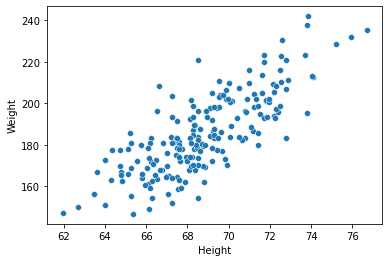

In [13]:
sns.scatterplot(x='Height',y="Weight",data=data)

<h2 style="color:green"> CORELATION COEFFICIENT </h2>

In [14]:
stats.pearsonr(data.Height,data.Weight)

(0.7851738035199147, 7.227125316080134e-43)

<h2 style="color:green"> TRAIN THE MODEL ON TRAINING SET AND EVALUATE THE MODEL</h2>

In [15]:
train_x=train.Height
train_y=train.Weight
train_x=sm.add_constant(train_x)
model=sm.OLS(train_y,train_x).fit()
model.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     248.9
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           2.84e-34
Time:                        23:21:04   Log-Likelihood:                -620.37
No. Observations:                 160   AIC:                             1245.
Df Residuals:                     158   BIC:                             1251.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -214.2100     25.309     -8.464      0.000    -264.197    -164.223
Height         5.8032      0.368     15.776      0.000       5.077       6.530
==============================================================================
Omnibus:                        4.407   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.926
Skew:                           0.354   Prob(JB):                        0.140
Kurtosis:                       3.296   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h2 style="color:green"> PREDICT THE TEST</h2>

In [16]:
test_x=test.Height
test_y=test.Weight
test_x=sm.add_constant(test_x)
z=model.predict(test_x)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h2 style="color:green"> PREDICT THE TEST BY SCATTERPLOT AND LINEPLOT </h2>

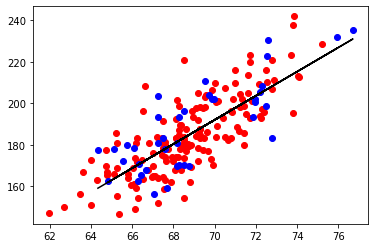

In [17]:
plt.scatter(train.Height,train.Weight,color='red')
plt.scatter(test.Height,test.Weight,color='blue')
plt.plot(test.Height,z,color='black')

<h2 style="color:green"> Hence,HEIGHT AND WEIGHT ARE DIRECTLY PROPOTIONAL</h2>